In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv('Mall_Customers.csv')

In [4]:
df.head(2)
#how much an costumers spends

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


In [5]:
#purpose we need to identify patterns
#we will great dependent varibales
#we dont have dependent variable but try to know which is dependent variable
#customerID has no any impact on these hence we skip 
x=df.iloc[:,[3,4]].values
#to visulaize we choose only 2 features i.e is annual income and spendingscore 

# Elbow Method to find number of cluster

In [8]:
from sklearn.cluster import KMeans
#we need to try different number of clusters as we need to see where wcss is declining
wcss=[]
for i in range(0,10):
    Kmeans=KMeans(n_clusters=i+1,init='k-means++',random_state=42)#we dont fall into random intialization we use kmeans++fro advnace
    Kmeans.fit(x)
    wcss.append(Kmeans.inertia_)
wcss    

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of

[269981.28,
 181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37233.814510710006,
 30241.34361793658,
 25036.417604033988,
 21916.79478984373,
 20072.070939404002]

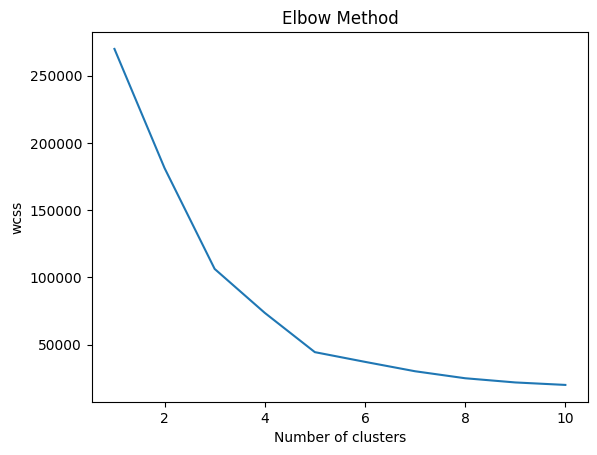

In [9]:
#plotting graph of Elbow method
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [10]:
#we get 5 clusters we choose i.e its starts reducing ......
#Traing the K means method for 5 clusters

In [13]:
Kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
y_kmeans=Kmeans.fit_predict(x)#It returns dependent variable

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [14]:
y_kmeans

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

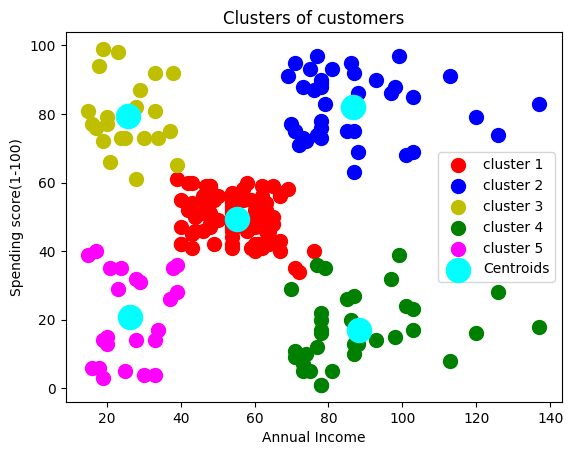

In [17]:
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,color='r',label='cluster 1')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,color='b',label='cluster 2')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,color='y',label='cluster 3')
plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1],s=100,color='g',label='cluster 4')
plt.scatter(x[y_kmeans==4,0],x[y_kmeans==4,1],s=100,color='magenta',label='cluster 5')
plt.scatter(Kmeans.cluster_centers_[:,0],Kmeans.cluster_centers_[:,1],s=300,color='cyan',label='Centroids')#x and y coordinates of centroid
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending score(1-100)')
plt.legend()
plt.show()

In [ ]:
#we can target the group of costumers for which brands u need to give
#we identify different group of clusters